# Feature Engineering

Feature Engineering is applied to a dataset to obtain more effective models with the domain knowledge guide.

Feature Engineering can be proceduralized as follows;

1. <a href='#feature_selection_section'><b>Feature Selection</b></a>
2. <a href='#encoding_section'><b>Encoding</b></a>
3. <a href='#feature_scaling_section'><b>Feature Scaling</b></a><br>
4. <a href='#storing_section'><b>Storing The Data</b></a><br>

---

## Data Read

In [1]:
# Import necessary libraries for data obtaining
import pandas as pd

In [2]:
# Read the data into a data frame
cleaned_data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
cleaned_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
# Splittng the predictors(X) and target(Y) features into two different data frames

cleaned_data_X =  cleaned_data[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]
cleaned_data_Y = cleaned_data[['Diabetes_binary']]

In [5]:
cleaned_data.shape

(253680, 22)

In [6]:
cleaned_data_X.shape

(253680, 21)

In [7]:
cleaned_data_Y.shape

(253680, 1)

---

<a id='feature_selection_section'></a>
## 1. Feature Selection

In this section, features, which are going to be used in the models, are selected by considering Data Exploration step results and domain knowledge.

In [8]:
# As it is indicated in the EDA section, below features have the highest correlations. Thus, only these features will be used
cleaned_data_X = cleaned_data_X[['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk']]
cleaned_data_X.head()

,HighBP,HighChol,BMI,GenHlth,DiffWalk
0,1.0,1.0,40.0,5.0,1.0
1,0.0,0.0,25.0,3.0,0.0
2,1.0,1.0,28.0,5.0,1.0
3,1.0,0.0,27.0,2.0,0.0
4,1.0,1.0,24.0,2.0,0.0


<a id='encoding_section'></a>
## 2. Encoding

In [14]:
# There is only GenHlth feature has the categorical values that might need to be encoded
encoded_data = pd.get_dummies(cleaned_data_X, columns=['GenHlth'])
encoded_data.head()

,HighBP,HighChol,BMI,DiffWalk,GenHlth_1.0,GenHlth_2.0,GenHlth_3.0,GenHlth_4.0,GenHlth_5.0
0,1.0,1.0,40.0,1.0,0,0,0,0,1
1,0.0,0.0,25.0,0.0,0,0,1,0,0
2,1.0,1.0,28.0,1.0,0,0,0,0,1
3,1.0,0.0,27.0,0.0,0,1,0,0,0
4,1.0,1.0,24.0,0.0,0,1,0,0,0


---

<a id='feature_scaling_section'></a>
## 3. Feature Scaling

In [15]:
# Necessary library
import seaborn as sns

---

### Predictor Scaling

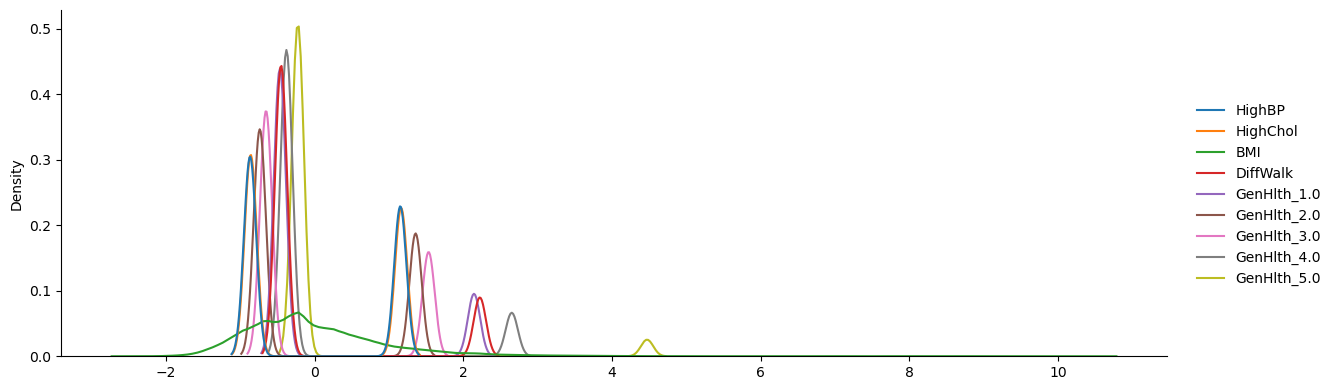

In [18]:
# Predictor Standardization
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardized = encoded_data.copy(deep=True)
standardized[:] = standardizer.fit_transform(standardized[:])
standardized = pd.DataFrame(standardized)
sns.displot(standardized, kind='kde', aspect=3, height=4)

---

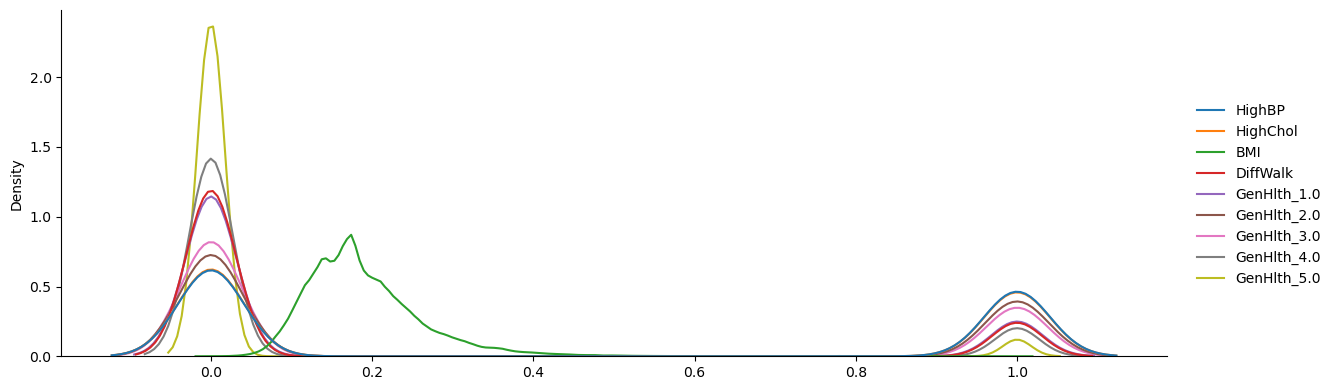

In [19]:
# Predictor Normalization
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalized = encoded_data.copy(deep=True)
normalized[normalized.columns[:]] = normalizer.fit_transform(normalized[:])
normalized = pd.DataFrame(normalized)
sns.displot(normalized, kind='kde', aspect=3, height=4)

---

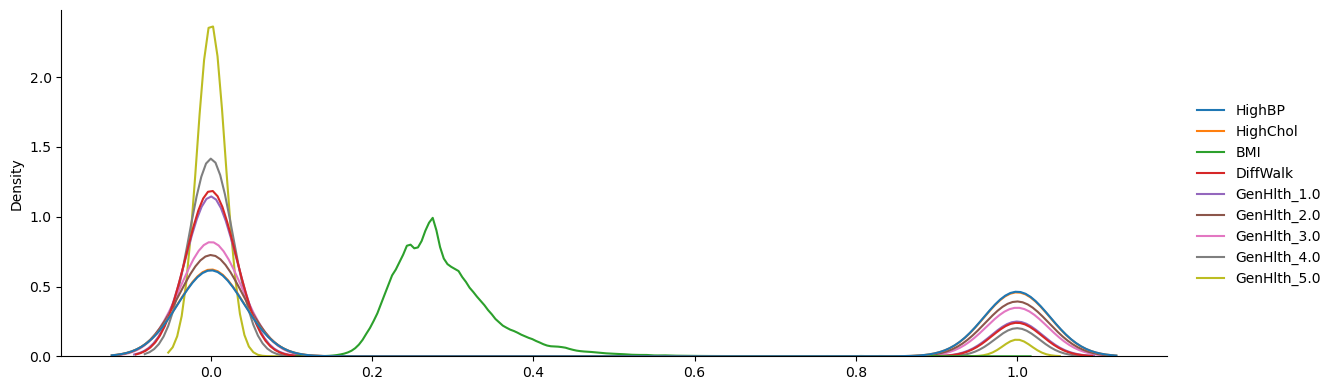

In [20]:
# Predictor Maximum Absolute Scaling
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler = MaxAbsScaler()
max_abs_scaled = encoded_data.copy(deep=True)
max_abs_scaled[max_abs_scaled.columns[:]] = max_abs_scaler.fit_transform(max_abs_scaled[:])
max_abs_scaled = pd.DataFrame(max_abs_scaled)
sns.displot(max_abs_scaled, kind='kde', aspect=3, height=4)

---

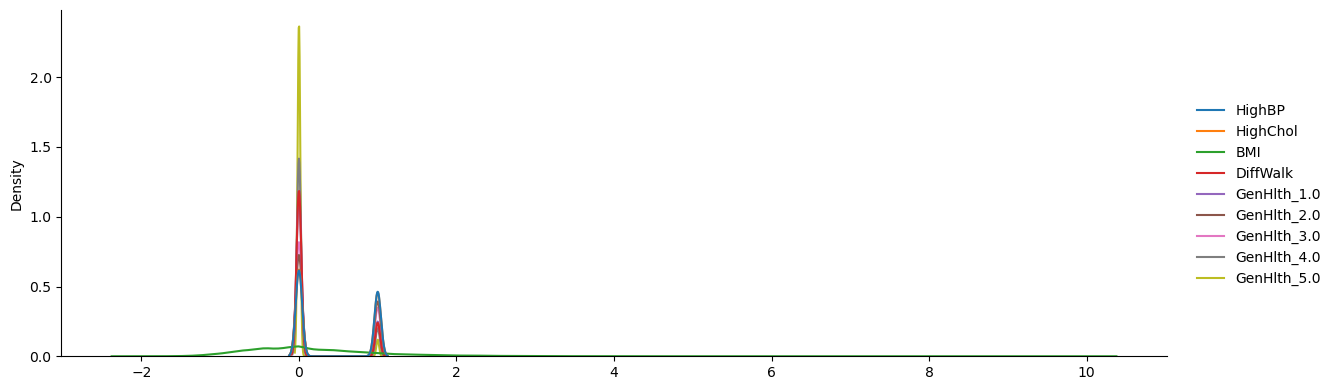

In [21]:
# Predictor Robust Scaling
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaled = encoded_data.copy(deep=True)
robust_scaled[robust_scaled.columns[:]] = robust_scaler.fit_transform(robust_scaled[:])
robust_scaled = pd.DataFrame(robust_scaled)
sns.displot(robust_scaled, kind='kde', aspect=3, height=4)

---

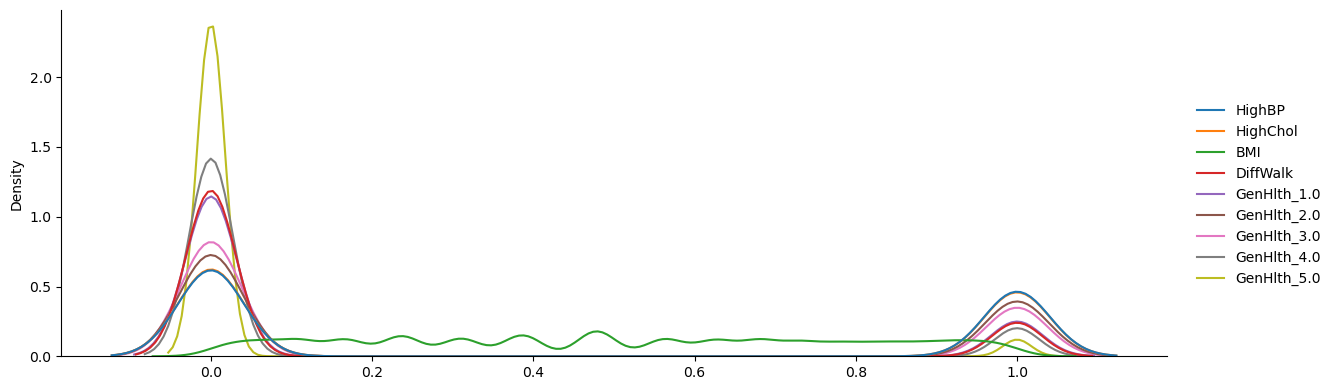

In [22]:
# Predictor Quantile Transformer Scaling
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer()
quantile_transformed = encoded_data.copy(deep=True)
quantile_transformed[quantile_transformed.columns[:]] = quantile_transformer.fit_transform(quantile_transformed[:])
quantile_transformed = pd.DataFrame(quantile_transformed)
sns.displot(quantile_transformed, kind='kde', aspect=3, height=4)

---

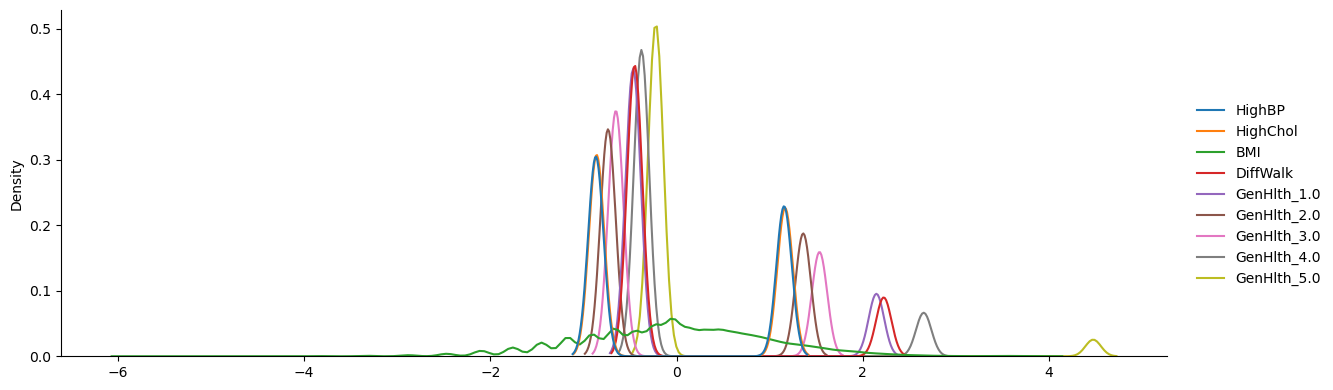

In [23]:
# Predictor Power Transformer Scaling (with Yeo-Johnson Transform)
from sklearn.preprocessing import power_transform
powered = encoded_data.copy(deep=True)
powered[powered.columns[:]] = power_transform(powered, method='yeo-johnson')
powered = pd.DataFrame(powered)
sns.displot(powered, kind='kde', aspect=3, height=4)

---

According to the results, Normalization scaling might be more compatible with the machne learning algorithms because of considering 0 and 1 centric approach.

---

### Target Scaling

In [24]:
# Necessary library
import numpy as np

---

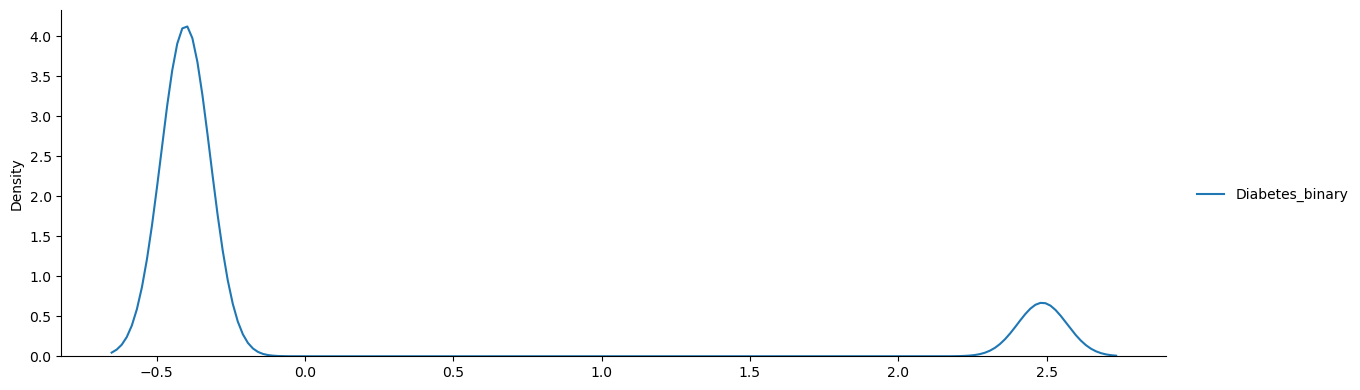

In [25]:
# Target Standardization
from sklearn.preprocessing import StandardScaler
standardizer_y = StandardScaler()
standardized_y = cleaned_data_Y.copy(deep=True)
standardized_y[:] = standardizer_y.fit_transform(standardized_y[:])
standardized_y = pd.DataFrame(standardized_y)
sns.displot(standardized_y, kind='kde', aspect=3, height=4)

---

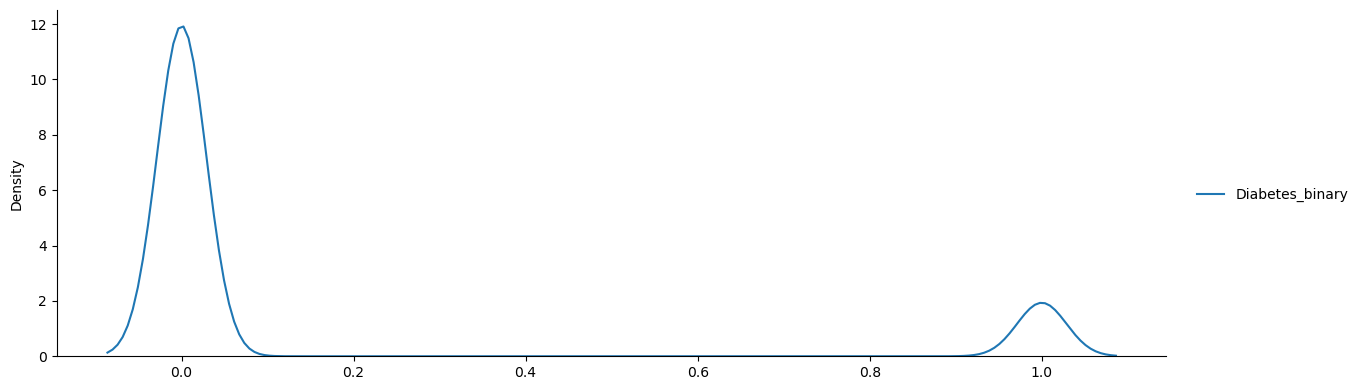

In [26]:
# Target Normalization
from sklearn.preprocessing import MinMaxScaler
normalizer_y = MinMaxScaler()
normalized_y = cleaned_data_Y.copy(deep=True)
normalized_y[normalized_y.columns[:]] = normalizer_y.fit_transform(normalized_y[:])
normalized_y = pd.DataFrame(normalized_y)
sns.displot(normalized_y, kind='kde', aspect=3, height=4)

---

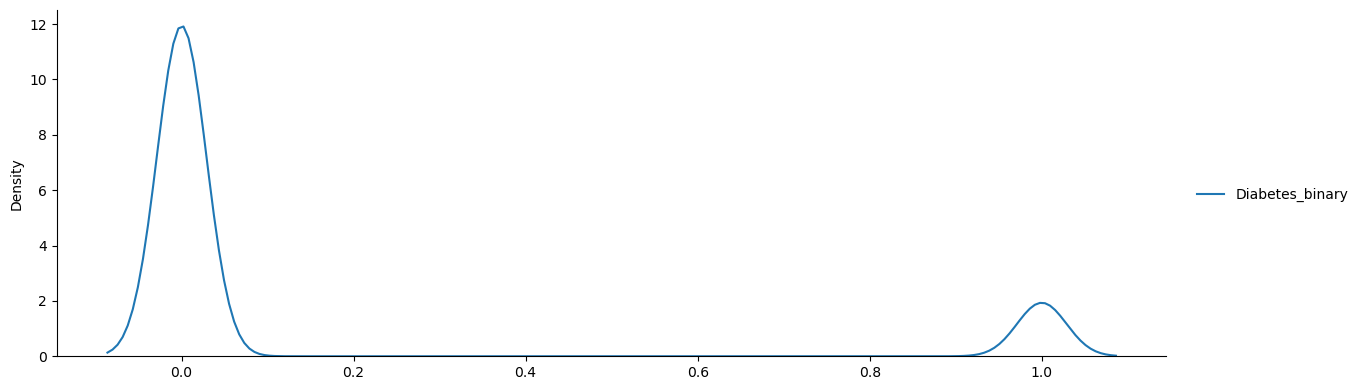

In [27]:
# Target Maximum Absolute Scaling
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler_y = MaxAbsScaler()
max_abs_scaled_y = cleaned_data_Y.copy(deep=True)
max_abs_scaled_y[max_abs_scaled_y.columns[:]] = max_abs_scaler_y.fit_transform(max_abs_scaled_y[:])
max_abs_scaled_y = pd.DataFrame(max_abs_scaled_y)
sns.displot(max_abs_scaled_y, kind='kde', aspect=3, height=4)

---

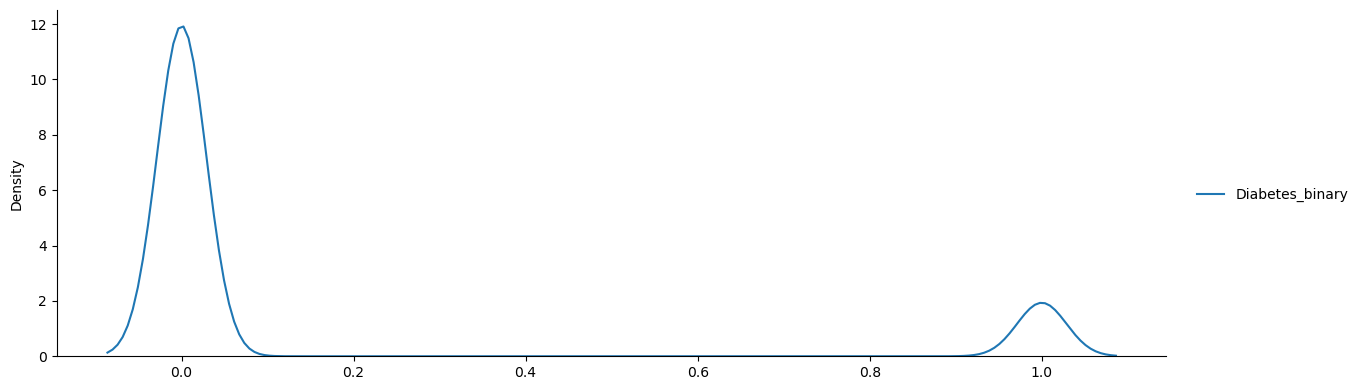

In [28]:
# Target Quantile Transformer Scaling
from sklearn.preprocessing import QuantileTransformer
quantile_transformer_y = QuantileTransformer()
quantile_transformed_y = cleaned_data_Y.copy(deep=True)
quantile_transformed_y[quantile_transformed_y.columns[:]] = quantile_transformer_y.fit_transform(quantile_transformed_y[:])
quantile_transformed_y = pd.DataFrame(quantile_transformed_y)
sns.displot(quantile_transformed_y, kind='kde', aspect=3, height=4)

---

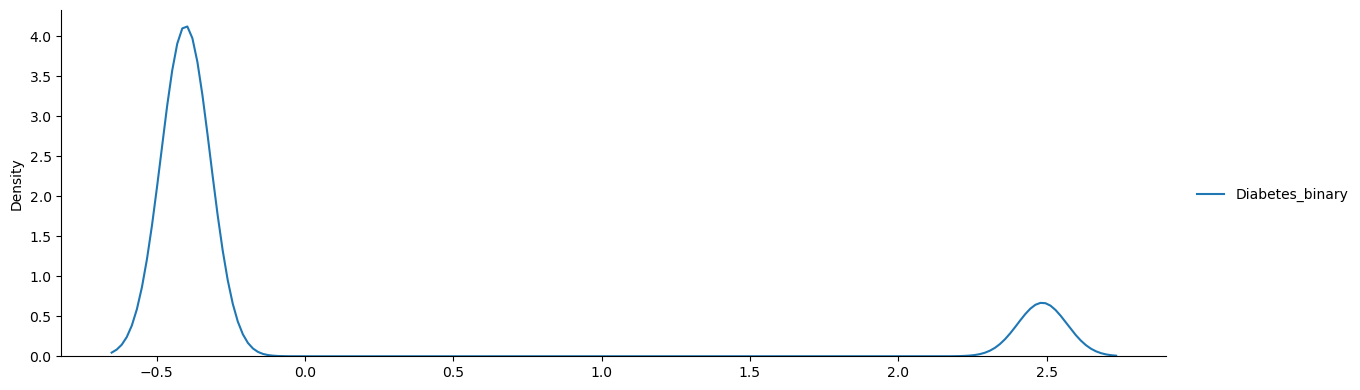

In [29]:
# Target Power Transformer Scaling (with Yeo-Johnson Transform)
from sklearn.preprocessing import power_transform
powered_y = cleaned_data_Y.copy(deep=True)
powered_y[powered_y.columns[:]] = power_transform(powered_y, method='yeo-johnson')
powered_y = pd.DataFrame(powered_y)
sns.displot(powered_y, kind='kde', aspect=3, height=4)

---

As the results suggests, Normalization has more 0 and 1 centric results than Standardization and Yeo-Jenson Scaling as well as Maximum Absolute Scaling and Quantile Scaling. Thus, Normalization will be used for the scaling algorithm.

---

<a id='storing_section'></a>
## 4. Storing The Data

The data that is applied feature engineering method is stored in this section.

In [31]:
# If predictors and/or target are scaleed, then choose the proper scaling algoritmh before storing
transformed_data = pd.DataFrame()
transformed_data[normalized.columns] = normalized
transformed_data[normalized_y.columns] = normalized_y

In [32]:
transformed_data.head()

,HighBP,HighChol,BMI,DiffWalk,GenHlth_1.0,GenHlth_2.0,GenHlth_3.0,GenHlth_4.0,GenHlth_5.0,Diabetes_binary
0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.151163,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.186047,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.174419,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.139535,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
transformed_data.shape

(253680, 10)

In [34]:
# Stroing the transformed data
transformed_data.to_csv('Transformed_Data.csv', index=False)

---